## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [233]:
import pandas as pd

In [234]:
pip install psycopg2


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [235]:
import sqlalchemy

In [236]:
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
from scipy import stats
import seaborn as sns

In [237]:
POSTGRES_ADDRESS = 'lhl-data-bootcamp.crzjul5qln0e.ca-central-1.rds.amazonaws.com' 
POSTGRES_PORT = '5432' 
POSTGRES_USERNAME = 'lhl_student' 
POSTGRES_PASSWORD = 'lhl_student' 
POSTGRES_DBNAME='mid_term_project'
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=POSTGRES_USERNAME, 
                                                                                        password=POSTGRES_PASSWORD, 
                                                                                        ipaddress=POSTGRES_ADDRESS, 
                                                                                        port=POSTGRES_PORT, 
                                                                                        dbname=POSTGRES_DBNAME))

In [238]:
cnx = create_engine(postgres_str)

In [239]:
df_flight=pd.read_sql_query('''SELECT * FROM flights ORDER BY RANDOM() LIMIT 10000;''', cnx)

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [240]:
df_flight.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-02-27,AA,AA_CODESHARE,AA,5742,YV,N956LR,5742,14262,PSP,...,261.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2019-01-20,AA,AA,AA,196,AA,N940NN,196,12953,LGA,...,733.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2019-05-09,AA,AA,AA,140,AA,N359PX,140,10721,BOS,...,867.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2019-03-21,AA,AA_CODESHARE,AA,5686,OH,N505AE,5686,11057,CLT,...,640.0,10.0,0.0,0.0,0.0,31.0,None,NaN,NaN,None
4,2018-04-25,AS,AS,AS,694,AS,N408AS,694,14747,SEA,...,224.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [241]:
df_flight.isnull().sum()

fl_date                    0
mkt_unique_carrier         0
branded_code_share         0
mkt_carrier                0
mkt_carrier_fl_num         0
op_unique_carrier          0
tail_num                  26
op_carrier_fl_num          0
origin_airport_id          0
origin                     0
origin_city_name           0
dest_airport_id            0
dest                       0
dest_city_name             0
crs_dep_time               0
dep_time                 169
dep_delay                169
taxi_out                 175
wheels_off               175
wheels_on                177
taxi_in                  177
crs_arr_time               0
arr_time                 176
arr_delay                197
cancelled                  0
cancellation_code       9445
diverted                   0
dup                        0
crs_elapsed_time           0
actual_elapsed_time      195
air_time                 196
flights                    0
distance                   0
carrier_delay           8122
weather_delay 

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [242]:
import datetime

In [243]:
df_task2=df_flight.copy(deep=True)

In [244]:
df_task2.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-02-27,AA,AA_CODESHARE,AA,5742,YV,N956LR,5742,14262,PSP,...,261.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2019-01-20,AA,AA,AA,196,AA,N940NN,196,12953,LGA,...,733.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2019-05-09,AA,AA,AA,140,AA,N359PX,140,10721,BOS,...,867.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2019-03-21,AA,AA_CODESHARE,AA,5686,OH,N505AE,5686,11057,CLT,...,640.0,10.0,0.0,0.0,0.0,31.0,None,NaN,NaN,None
4,2018-04-25,AS,AS,AS,694,AS,N408AS,694,14747,SEA,...,224.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [245]:
df_task2['fl_date']=pd.to_datetime(df_task2['fl_date'])
df_task2['month']=df_task2['fl_date'].dt.month

In [246]:
df_mean=df_task2[['month', 'dep_delay','arr_delay']].groupby(['month']).mean()
df_median=df_task2[['month', 'dep_delay','arr_delay']].groupby(['month']).median()

In [247]:
df_mean.head()

,dep_delay,arr_delay
month,,
1,10.267097,4.506460
2,14.754518,9.187311
3,8.402186,2.180525
4,8.857143,3.618047
5,12.761446,8.909201


<AxesSubplot:xlabel='month', ylabel='arr_delay'>

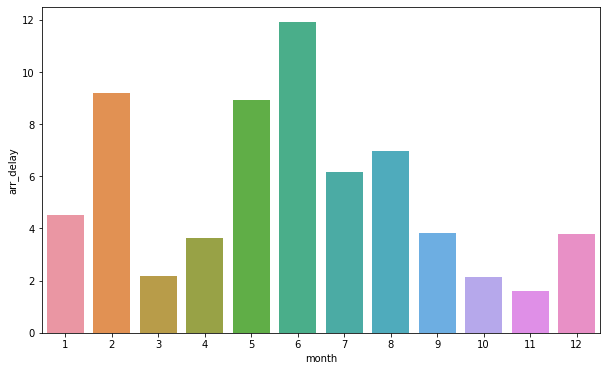

In [249]:
import plotly.express as go 
fig=plt.subplots(figsize=(10, 6))
sns.barplot(x=df_mean.index, y=df_mean['arr_delay'])

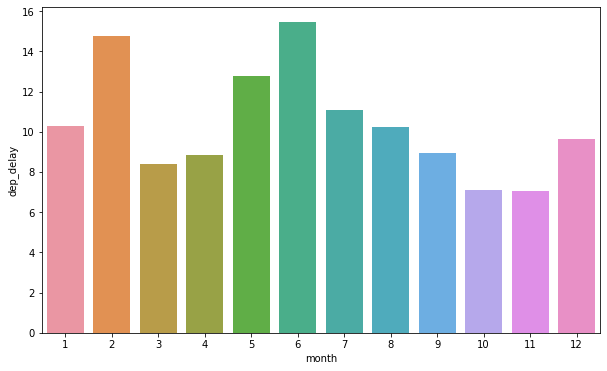

In [250]:
fig=plt.figure(figsize=(10, 6))

sns.barplot(x=df_mean.index, y=df_mean['dep_delay'])
plt.show()

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [315]:
df_task3=df_flight.copy(deep=True)
df_task3.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [314]:
df_w=pd.read_sql_query('''SELECT * FROM flights_test ORDER BY RANDOM() LIMIT 10000;''', cnx)
df_w.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,2020-01-12,UA,UA,UA,520,UA,N77520,520,13495,MSY,"New Orleans, LA",12266,IAH,"Houston, TX",1203,1331,N,88,1,305
1,2020-01-19,DL,DL,DL,2169,DL,N395DZ,2169,14492,RDU,"Raleigh/Durham, NC",10397,ATL,"Atlanta, GA",1845,2021,N,96,1,356
2,2020-01-22,AA,AA,AA,650,AA,N543UW,650,14107,PHX,"Phoenix, AZ",12892,LAX,"Los Angeles, CA",1759,1829,N,90,1,370
3,2020-01-08,AA,AA_CODESHARE,AA,4976,PT,N658AE,4976,10821,BWI,"Baltimore, MD",14100,PHL,"Philadelphia, PA",1609,1707,N,58,1,90
4,2020-01-12,DL,DL,DL,1159,DL,N916DN,1159,10397,ATL,"Atlanta, GA",10792,BUF,"Buffalo, NY",1408,1611,N,123,1,712


In [316]:
df_task3['fl_date']=pd.to_datetime(df_task3['fl_date'])
df_task3['month']=df_task3['fl_date'].dt.month

In [318]:
df_mean=df_task3[['month', 'weather_delay']].groupby(['month']).mean()
df_median=df_task3[['month', 'weather_delay']].groupby(['month']).median()

<AxesSubplot:xlabel='month', ylabel='weather_delay'>

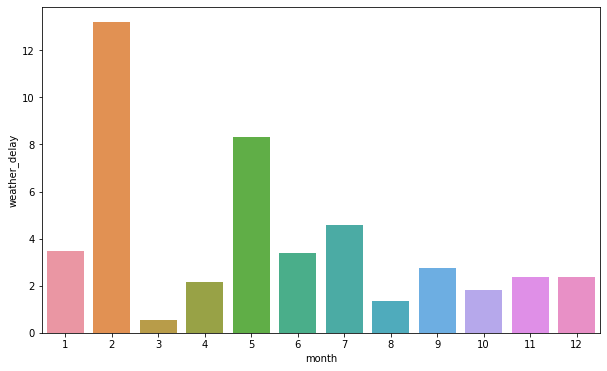

In [319]:
import plotly.express as go 
fig=plt.subplots(figsize=(10, 6))
sns.barplot(x=df_mean.index, y=df_mean['weather_delay'])

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [252]:
df_task4=df_flight.copy(deep=True)
taxi_out=df_task4.groupby(['origin']).agg({'taxi_out':['count', 'mean']}).reset_index()
taxi_out

origin taxi_out           
              count       mean
0      ABE        5  14.000000
1      ABI        1   9.000000
2      ABQ       19  13.473684
3      ABY        2  13.000000
4      ACV        1   7.000000
..     ...      ...        ...
315    WRG        1   9.000000
316    XNA       13  15.307692
317    XWA        1  15.000000
318    YAK        1   5.000000
319    YUM        1  10.000000

[320 rows x 3 columns]

In [253]:
import plotly.express as go
plt.figure(figsize=(12, 8))

fig=go.scatter(x=taxi_out[('taxi_out', 'count')], y=taxi_out[('taxi_out', 'mean')], color=taxi_out['origin'])
fig.show()

<Figure size 864x576 with 0 Axes>

In [254]:
taxi_in=df_task4.groupby(['dest']).agg({'taxi_in':['count', 'mean']}).reset_index()

plt.figure(figsize=(12, 8))

fig=go.scatter(x=taxi_in[('taxi_in', 'count')], y=taxi_in[('taxi_in', 'mean')], color=taxi_in['dest'])
fig.show()

<Figure size 864x576 with 0 Axes>

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [255]:
features = [
 'fl_date',
 'mkt_carrier',
 'dep_delay',
 'taxi_out',
 'taxi_in',
 'crs_arr_time',
 'arr_time',
 'arr_delay',
 'crs_elapsed_time',
 'actual_elapsed_time',
 'air_time',
 'distance']
delays = df_flight[features]

In [256]:
delays['delays_sum']=delays['arr_delay']+delays['dep_delay']
delays['make_up_times']=''
for i in delays.index:
    if delays._get_value(i, 'dep_delay')>0:
        if delays._get_value(i, 'dep_delay')<=delays._get_value(i, 'arr_delay'):
            delays._set_value(i, 'make_up_times', 'no')
        
        else:
            delays._set_value(i, 'make_up_times', 'yes')
    else:
        delays._set_value(i, 'make_up_times', 'no departure delay')

C:\Users\benny\AppData\Local\Temp\ipykernel_13136\1595251494.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\benny\AppData\Local\Temp\ipykernel_13136\1595251494.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [257]:
delays.head()

,fl_date,mkt_carrier,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,delays_sum,make_up_times
0,2019-02-27,AA,-2.0,14.0,8.0,1400,1357.0,-3.0,67.0,66.0,44.0,261.0,-5.0,no departure delay
1,2019-01-20,AA,-1.0,20.0,10.0,2216,2146.0,-30.0,166.0,137.0,107.0,733.0,-31.0,no departure delay
2,2019-05-09,AA,-6.0,17.0,14.0,1205,1148.0,-17.0,174.0,163.0,132.0,867.0,-23.0,no departure delay
3,2019-03-21,AA,59.0,15.0,4.0,2351,32.0,41.0,136.0,118.0,99.0,640.0,100.0,yes
4,2018-04-25,AS,-3.0,17.0,6.0,2303,2259.0,-4.0,63.0,62.0,39.0,224.0,-7.0,no departure delay


In [258]:
delays['mkt_carrier'].unique()

array(['AA', 'AS', 'B6', 'DL', 'WN', 'UA', 'NK', 'F9', 'HA', 'G4', 'VX'],
      dtype=object)

In [259]:
# airlines that make up for delays

airline_dep_delays={'AA':[0,0,0], 'DL':[0,0,0], 'B6':[0,0,0], 'AS':[0,0,0], 'HA':[0,0,0], 'UA':[0,0,0], 'NK':[0,0,0], 'WN':[0,0,0],'F9':[0,0,0], 'G4':[0,0,0],'VX':[0,0,0]}

for i in delays.index:
    if delays._get_value(i, 'make_up_times')=='yes':
        airline_dep_delays[delays._get_value(i,'mkt_carrier')][0] +=1
    
    elif delays._get_value(i, 'make_up_times')=='no':
        airline_dep_delays[delays._get_value(i,'mkt_carrier')][1] +=1
    
    else: 
        airline_dep_delays[delays._get_value(i,'mkt_carrier')][2] +=1
        
#k[0] is when dep_delay is greater than arrival delay but it is managed to arrive shorter delay than the departure
#k[1] is when there is a departure delay but the plane arrives with no delay to its destination.
for j, k in airline_dep_delays.items():
    print(f'{j} is able to make up for departure delay upto: {round(k[0]/(k[0]+k[1])*100)} % of the time') 

AA is able to make up for departure delay upto: 68 % of the time
DL is able to make up for departure delay upto: 71 % of the time
B6 is able to make up for departure delay upto: 64 % of the time
AS is able to make up for departure delay upto: 65 % of the time
HA is able to make up for departure delay upto: 47 % of the time
UA is able to make up for departure delay upto: 65 % of the time
NK is able to make up for departure delay upto: 73 % of the time
WN is able to make up for departure delay upto: 81 % of the time
F9 is able to make up for departure delay upto: 71 % of the time
G4 is able to make up for departure delay upto: 72 % of the time
VX is able to make up for departure delay upto: 56 % of the time


In [260]:
for j, k in airline_dep_delays.items():
    print(f'{j} gets delayed at departure upto: {round((k[0]+k[1])/(k[0]+k[1]+k[2])*100)} % of the time')

AA gets delayed at departure upto: 30 % of the time
DL gets delayed at departure upto: 29 % of the time
B6 gets delayed at departure upto: 39 % of the time
AS gets delayed at departure upto: 28 % of the time
HA gets delayed at departure upto: 26 % of the time
UA gets delayed at departure upto: 30 % of the time
NK gets delayed at departure upto: 28 % of the time
WN gets delayed at departure upto: 48 % of the time
F9 gets delayed at departure upto: 42 % of the time
G4 gets delayed at departure upto: 32 % of the time
VX gets delayed at departure upto: 53 % of the time


#### **Task 6**: How many states cover 50% of US air traffic? 

In [261]:
df_task6=df_flight.copy(deep=True)

In [262]:
df_task6.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [263]:
df_task6[['origin_city_name', 'dest_city_name']].head()

,origin_city_name,dest_city_name
0,"Palm Springs, CA","Phoenix, AZ"
1,"New York, NY","Chicago, IL"
2,"Boston, MA","Chicago, IL"
3,"Charlotte, NC","Little Rock, AR"
4,"Seattle, WA","Spokane, WA"


In [264]:
df_task6['origin_state']=df_task6['origin_city_name'].apply(lambda x: x.split(', ')[1])
df_task6['destination_state']=df_task6['dest_city_name'].apply(lambda x: x.split(', ')[1])
df_task6.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,origin_state,destination_state
0,2019-02-27,AA,AA_CODESHARE,AA,5742,YV,N956LR,5742,14262,PSP,...,NaN,NaN,NaN,NaN,None,NaN,NaN,None,CA,AZ
1,2019-01-20,AA,AA,AA,196,AA,N940NN,196,12953,LGA,...,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NY,IL
2,2019-05-09,AA,AA,AA,140,AA,N359PX,140,10721,BOS,...,NaN,NaN,NaN,NaN,None,NaN,NaN,None,MA,IL
3,2019-03-21,AA,AA_CODESHARE,AA,5686,OH,N505AE,5686,11057,CLT,...,0.0,0.0,0.0,31.0,None,NaN,NaN,None,NC,AR
4,2018-04-25,AS,AS,AS,694,AS,N408AS,694,14747,SEA,...,NaN,NaN,NaN,NaN,None,NaN,NaN,None,WA,WA


In [265]:
flights_per_state_origin=df_task6.groupby('origin_state')['fl_date'].count().sort_values(ascending=False)
flights_per_state_destination=df_task6.groupby('destination_state')['fl_date'].count().sort_values(ascending=False)

Text(0, 0.5, 'Origin State')

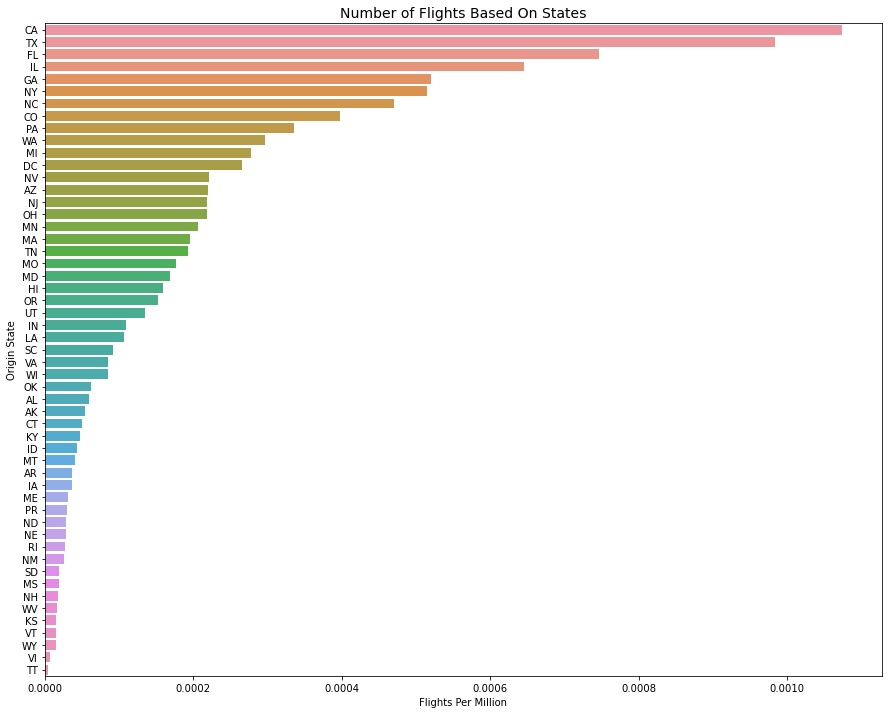

In [266]:
ax=plt.subplots(figsize=(15, 12))
million=1000000
ax=sns.barplot(x=flights_per_state_origin.values/million, y=flights_per_state_origin.index)
ax.set_title('Number of Flights Based On States', fontsize=14)
ax.set_xlabel('Flights Per Million')
ax.set_ylabel('Origin State')

Text(0, 0.5, 'Destination State')

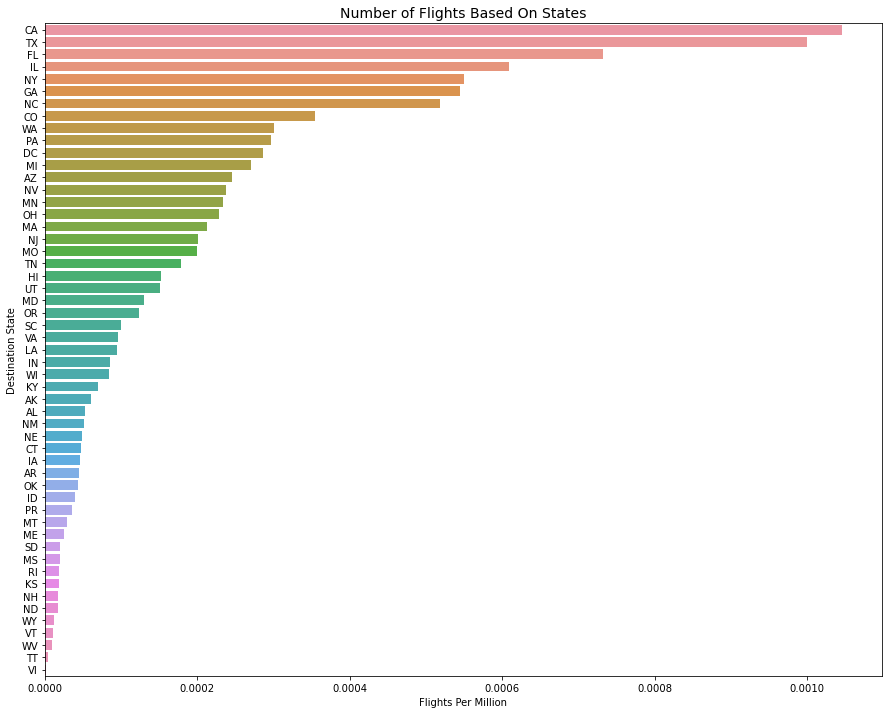

In [267]:
ax=plt.subplots(figsize=(15, 12))
million=1000000
ax=sns.barplot(x=flights_per_state_destination/million, y=flights_per_state_destination.index)
ax.set_title('Number of Flights Based On States', fontsize=14)
ax.set_xlabel('Flights Per Million')
ax.set_ylabel('Destination State')

In [268]:
total_flights=flights_per_state_origin + flights_per_state_destination
flight_perc=total_flights.sum()*0.5
states=[]
total=0
num=False

In [269]:
for state, number in total_flights.sort_values(ascending=False).items():
    if total<=flight_perc:
        states.append(state)
        total +=number
        
    if total > flight_perc:
        num =True
    
    elif num == True:
        break

print('States that cover 50% of US Air Traffic:')
for state in states:
    print(state)

States that cover 50% of US Air Traffic:
CA
TX
FL
IL
NY
GA
NC
CO


#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [363]:
df_task7=df_flight.copy(deep=True)
# df_task7.head()

In [364]:
df_task7['air_time'].sort_values(ascending=False)

2413    660.0
162     530.0
7554    527.0
6524    495.0
530     468.0
        ...  
9742      NaN
9772      NaN
9900      NaN
9962      NaN
9993      NaN
Name: air_time, Length: 10000, dtype: float64

In [365]:
df_task7['flight_speed']=(df_task7['distance']/df_task7['air_time'])*60

In [366]:
df_task7['flight_speed'] = df_task7['flight_speed'].fillna(0)
df_task7['flight_speed'].sort_values(ascending=False)

6524    601.454545
6736    591.724138
6808    585.171103
1476    584.171779
1205    583.650386
           ...    
2370      0.000000
2368      0.000000
5091      0.000000
2340      0.000000
8711      0.000000
Name: flight_speed, Length: 10000, dtype: float64

In [367]:
flightspeed_with_delay=df_task7.loc[(df_task7['dep_delay']>0), 'flight_speed']
flightspeed_without_delay=df_task7.loc[(df_task7['dep_delay']==0), 'flight_speed']

In [368]:
stats.f_oneway(flightspeed_with_delay, flightspeed_without_delay)

F_onewayResult(statistic=2.0048949191413814, pvalue=0.15687418066885714)

In [369]:
stats.ttest_ind(flightspeed_with_delay, flightspeed_without_delay)

Ttest_indResult(statistic=1.4159431200233257, pvalue=0.15687418066929598)

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [277]:
df_task8=df_flight.copy(deep=True)
df_task8.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [278]:
df_task8.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-02-27,AA,AA_CODESHARE,AA,5742,YV,N956LR,5742,14262,PSP,...,261.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2019-01-20,AA,AA,AA,196,AA,N940NN,196,12953,LGA,...,733.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2019-05-09,AA,AA,AA,140,AA,N359PX,140,10721,BOS,...,867.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2019-03-21,AA,AA_CODESHARE,AA,5686,OH,N505AE,5686,11057,CLT,...,640.0,10.0,0.0,0.0,0.0,31.0,None,NaN,NaN,None
4,2018-04-25,AS,AS,AS,694,AS,N408AS,694,14747,SEA,...,224.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [279]:
def convert_time(x):
    if np.isnan(x):
        return '00:00'
    
    if x == 2400:
        return '23:59'   
    string = str(int(x))
    
    if len(string)< 4:
        for _ in range(4-len(string)):
            string = '0' + string
    
    return string[:2] + ':' + string[2:]

In [280]:
df_task8['fl_date'] = pd.to_datetime(df_task8['fl_date'], format='%Y-%m-%d')

df_task8['dep_time'] = df_task8['dep_time'].apply(lambda x: convert_time(x))
df_task8['dep_time'] = pd.to_datetime(df_task8['dep_time'], format='%H:%M')
df_task8['dep_hr'] = df_task8['dep_time'].dt.hour

In [281]:
short_flights=df_task8[df_task8['air_time']<=180]
medium_flights=df_task8[(df_task8['air_time']> 180) & (df_task8['air_time']<=360)]
long_flights=df_task8[df_task8['air_time']>=360]

In [282]:
short_time=short_flights.groupby(by=[short_flights['dep_hr']])['taxi_out'].count().sort_values(ascending=False)
med_time=medium_flights.groupby(by=[medium_flights['dep_hr']])['taxi_out'].count().sort_values(ascending=False)
long_time=long_flights.groupby(by=[long_flights['dep_hr']])['taxi_out'].count().sort_values(ascending=False)

Text(0, 0.5, 'Number of flights')

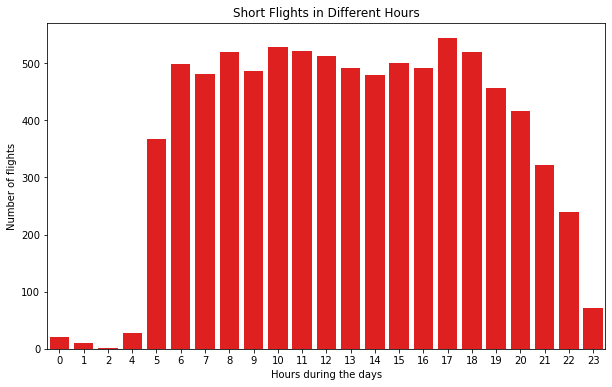

In [283]:
fig, ax=plt.subplots(figsize=(10, 6))

sns.barplot(ax=ax, x=short_time.index, y=short_time.values, color='r')
ax.set_title('Short Flights in Different Hours')
ax.set_xlabel('Hours during the days')
ax.set_ylabel('Number of flights')

Text(0, 0.5, 'Number of flights')

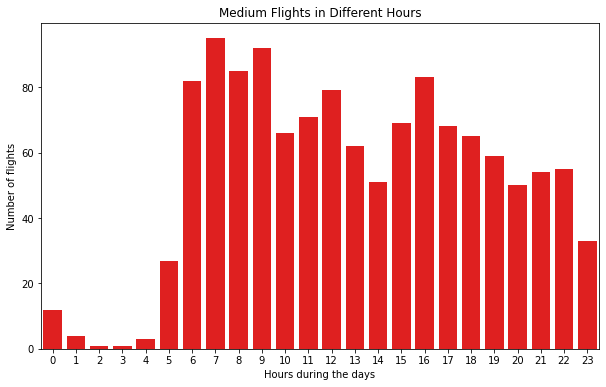

In [284]:
fig, ax=plt.subplots(figsize=(10, 6))

sns.barplot(ax=ax, x=med_time.index, y=med_time.values, color='r')
ax.set_title('Medium Flights in Different Hours')
ax.set_xlabel('Hours during the days')
ax.set_ylabel('Number of flights')

Text(0, 0.5, 'Number of flights')

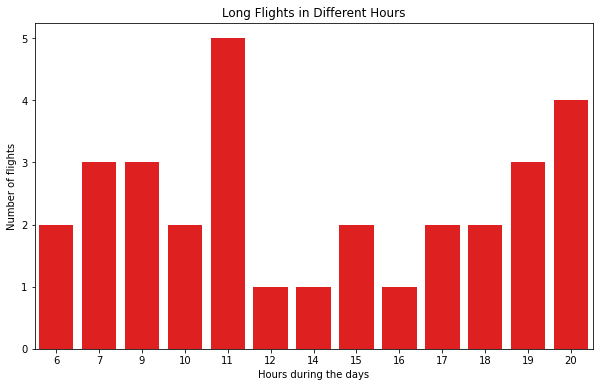

In [285]:
fig, ax=plt.subplots(figsize=(10, 6))

sns.barplot(ax=ax, x=long_time.index, y=long_time.values, color='r')
ax.set_title('Long Flights in Different Hours')
ax.set_xlabel('Hours during the days')
ax.set_ylabel('Number of flights')

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [286]:
df_pas=pd.read_sql_query('''SELECT * FROM passengers ORDER BY RANDOM() LIMIT 10000;''', cnx)

In [287]:
df_task9=df_pas.copy(deep=True)

In [288]:
df_task9.columns

Index(['departures_scheduled', 'departures_performed', 'payload', 'seats',
       'passengers', 'freight', 'mail', 'distance', 'ramp_to_ramp', 'air_time',
       'unique_carrier', 'airline_id', 'unique_carrier_name', 'region',
       'carrier', 'carrier_name', 'carrier_group', 'carrier_group_new',
       'origin_airport_id', 'origin_city_market_id', 'origin',
       'origin_city_name', 'origin_country', 'origin_country_name',
       'dest_airport_id', 'dest_city_market_id', 'dest', 'dest_city_name',
       'dest_country', 'dest_country_name', 'aircraft_group', 'aircraft_type',
       'aircraft_config', 'year', 'month', 'distance_group', 'class',
       'data_source'],
      dtype='object')

In [289]:
df_task9['dest']

0       MQY
1       SAN
2       FAY
3       BTT
4       CHS
       ... 
9995    PIZ
9996    KKA
9997    UNK
9998    CVG
9999    EWR
Name: dest, Length: 10000, dtype: object

In [290]:
busy_airports_dest=df_task9[['passengers', 'dest']].groupby('dest').sum().reset_index()

In [291]:
busy_airports_dest=busy_airports_dest.sort_values(by='passengers', ascending=False).head(10)
busy_airports_dest

,dest,passengers
48,ATL,929760.0
570,ORD,906992.0
436,LAX,768181.0
189,DFW,698093.0
374,JFK,576265.0
188,DEN,542976.0
435,LAS,540236.0
593,PHX,531593.0
524,MSP,526889.0
691,SFO,492512.0


Text(0, 0.5, 'Number of Passengers')

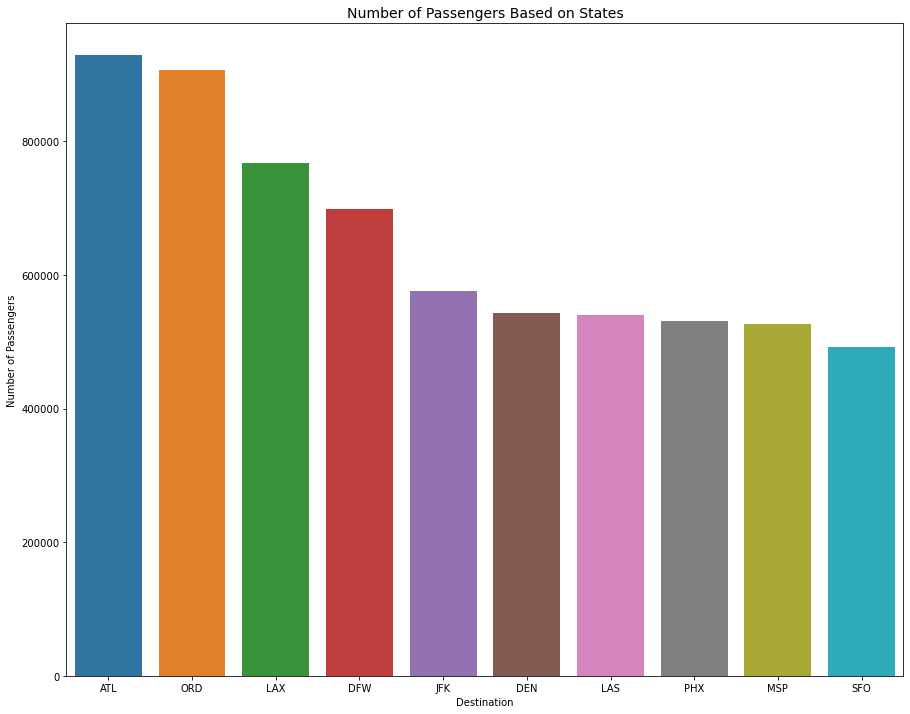

In [292]:
ax=plt.subplots(figsize=(15, 12))

ax=sns.barplot(x=busy_airports_dest.dest, y=busy_airports_dest.passengers)
ax.set_title('Number of Passengers Based on States', fontsize=14)
ax.set_xlabel('Destination')
ax.set_ylabel('Number of Passengers')

In [293]:
busy_airports_origin=df_task9[['passengers', 'origin']].groupby('origin').sum().reset_index()
busy_airports_origin=busy_airports_origin.sort_values(by='passengers', ascending=False).head(10)
busy_airports_origin

,origin,passengers
46,ATL,1168765.0
551,ORD,973280.0
406,LAX,955668.0
180,DFW,845088.0
179,DEN,723674.0
353,JFK,659916.0
97,BOS,519992.0
663,SEA,517851.0
665,SFO,505977.0
144,CLT,485241.0


Text(0, 0.5, 'Number of Passengers')

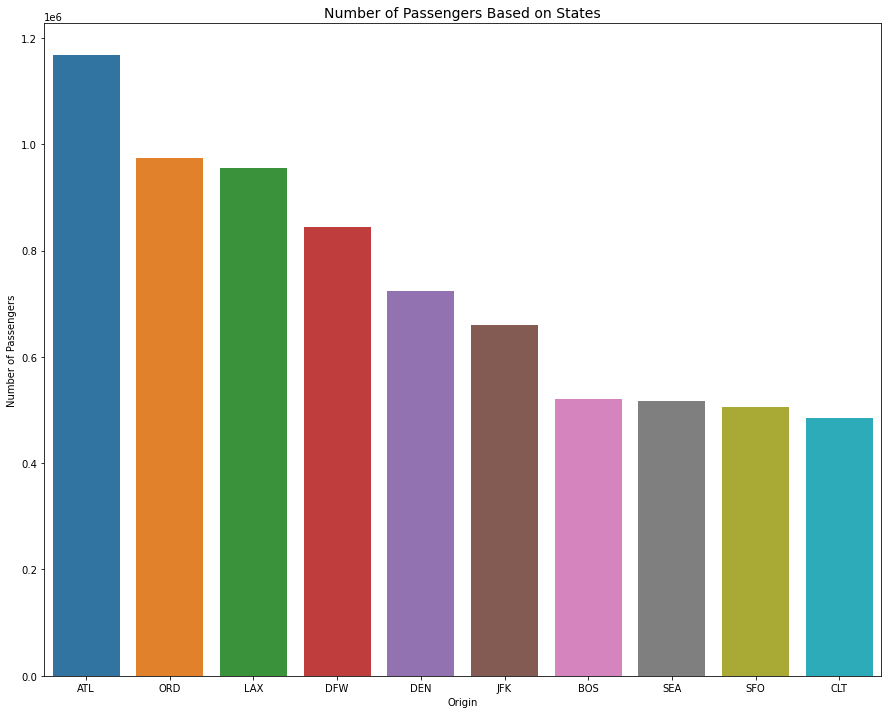

In [294]:
ax=plt.subplots(figsize=(15, 12))

ax=sns.barplot(x=busy_airports_origin.origin, y=busy_airports_origin.passengers)

ax.set_title('Number of Passengers Based on States', fontsize=14)
ax.set_xlabel('Origin')
ax.set_ylabel('Number of Passengers')

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [295]:
df_fuel=pd.read_sql_query('''SELECT * FROM fuel_comsumption ORDER BY RANDOM() LIMIT 10000;''', cnx)
df_fuel.head()

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,3,21634.0,KH,KH,Aloha Air Cargo,1,426607.0,0.0,0.0,0.0,...,842919.0,0.0,0.0,0.0,0.0,842919.0,842919.0,0.0,842919.0,2018
1,6,20409.0,B6,B6,JetBlue Airways,3,52913453.0,0.0,0.0,12348743.0,...,83355278.0,0.0,0.0,19453142.0,19453142.0,102808420.0,83355278.0,19598933.0,102954211.0,2016
2,11,20368.0,G4,G4,Allegiant Air,3,14306352.0,0.0,0.0,0.0,...,29153559.0,0.0,0.0,0.0,0.0,29153559.0,29255555.0,24611.0,29280166.0,2017
3,5,20453.0,ABX,ABX,ABX Air Inc,2,43151.0,0.0,0.0,0.0,...,148008.0,0.0,0.0,0.0,0.0,148008.0,148008.0,0.0,148008.0,2015
4,1,21645.0,23Q,23Q,Sky King Inc.,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015


In [296]:
df_fuel.isnull().sum()

month                0
airline_id           1
unique_carrier       1
carrier              0
carrier_name         1
carrier_group_new    0
sdomt_gallons        1
satl_gallons         1
spac_gallons         1
slat_gallons         2
sint_gallons         1
ts_gallons           1
tdomt_gallons        3
tint_gallons         1
total_gallons        6
sdomt_cost           0
satl_cost            1
spac_cost            1
slat_cost            1
sint_cost            1
ts_cost              0
tdomt_cost           0
tint_cost            1
total_cost           0
year                 0
dtype: int64

In [297]:
df_task10=df_flight.copy(deep=True)

In [298]:
df_task10['fl_date']=pd.to_datetime(df_task2['fl_date'])
print(df_task10['fl_date'].dtype)
df_task10['month']=pd.DatetimeIndex(df_task2['fl_date']).month

datetime64[ns]


In [299]:
#Average delays and distance covered by carriers
monthly_delay=df_task10.groupby(['month', 'mkt_unique_carrier'])['dep_delay'].mean()
monthly_distance=df_task10.groupby(['month','mkt_unique_carrier'])['distance'].sum()

In [300]:

monthly_delay

month  mkt_unique_carrier
1      AA                    11.321101
       AS                    -4.020833
       B6                    10.814815
       DL                     8.451389
       F9                     6.058824
                               ...    
12     G4                    75.166667
       HA                     8.666667
       NK                    -2.750000
       UA                     7.753086
       WN                    11.687075
Name: dep_delay, Length: 123, dtype: float64

In [301]:
df_task10_pas=df_pas.copy(deep=True)

In [302]:
df_task10.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name', 'month'],
      dtype='object')

In [303]:
#Number of passengers carreid by all carriers
pas_by_carriers=df_task10_pas[['passengers','unique_carrier']].groupby('unique_carrier').sum().sort_values(by='passengers', ascending=False)
pas_by_carriers

,passengers
unique_carrier,
WN,3202887.0
AA,3073666.0
DL,2971950.0
UA,2248203.0
B6,843946.0
...,...
CH,0.0
9S,0.0
KH,0.0


In [304]:
#total fuel consumption per carrir 
fuel_by_carriers=df_fuel[['total_gallons','unique_carrier']].groupby('unique_carrier').sum().sort_values(by='total_gallons', ascending=False)
fuel_by_carriers

,total_gallons
unique_carrier,
AA,1.663489e+10
DL,1.655025e+10
UA,1.595691e+10
WN,9.599040e+09
FX,5.464666e+09
...,...
9E,0.000000e+00
OH,0.000000e+00
CP,0.000000e+00


In [305]:
#Merging

delay_dest_merged=pd.merge(monthly_delay, monthly_distance, how='left', on=['mkt_unique_carrier', 'month']).reset_index()
delay_dest_merged

,mkt_unique_carrier,month,dep_delay,distance
0,AA,1,11.321101,150150.0
1,AS,1,-4.020833,42416.0
2,B6,1,10.814815,30511.0
3,DL,1,8.451389,106244.0
4,F9,1,6.058824,19995.0
...,...,...,...,...
118,G4,12,75.166667,5516.0
119,HA,12,8.666667,11608.0
120,NK,12,-2.750000,22099.0
121,UA,12,7.753086,137478.0


In [306]:
delay_dest_merged=delay_dest_merged.rename(columns={'mkt_unique_carrier': 'unique_carrier'})

In [307]:
pas_fuel_merged=pd.merge(pas_by_carriers, fuel_by_carriers, how='left', on='unique_carrier').reset_index()
pas_fuel_merged

,unique_carrier,passengers,total_gallons
0,WN,3202887.0,9.599040e+09
1,AA,3073666.0,1.663489e+10
2,DL,2971950.0,1.655025e+10
3,UA,2248203.0,1.595691e+10
4,B6,843946.0,3.767060e+09
...,...,...,...
272,CH,0.0,NaN
273,9S,0.0,3.637202e+08
274,KH,0.0,2.405682e+07
275,U7,0.0,2.807861e+07


In [308]:
fuel_pass = pd.merge(delay_dest_merged, pas_fuel_merged, how = 'right', on = 'unique_carrier')
fuel_pass

,unique_carrier,month,dep_delay,distance,passengers,total_gallons
0,WN,1.0,9.412214,99145.0,3202887.0,9.599040e+09
1,WN,2.0,11.961905,76135.0,3202887.0,9.599040e+09
2,WN,3.0,10.937500,139483.0,3202887.0,9.599040e+09
3,WN,4.0,10.732283,100617.0,3202887.0,9.599040e+09
4,WN,5.0,12.262069,108702.0,3202887.0,9.599040e+09
...,...,...,...,...,...,...
384,CH,NaN,NaN,NaN,0.0,NaN
385,9S,NaN,NaN,NaN,0.0,3.637202e+08
386,KH,NaN,NaN,NaN,0.0,2.405682e+07
387,U7,NaN,NaN,NaN,0.0,2.807861e+07


In [309]:
fuel_pass=fuel_pass.dropna()

In [310]:
fuel_pass['fuel consumpter per passenger']=fuel_pass['total_gallons']/fuel_pass['passengers']
fuel_pass['consumption per km']=fuel_pass['total_gallons']/fuel_pass['distance']

C:\Users\benny\AppData\Local\Temp\ipykernel_13136\448288545.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\benny\AppData\Local\Temp\ipykernel_13136\448288545.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [311]:
fuel_pass.head()

,unique_carrier,month,dep_delay,distance,passengers,total_gallons,fuel consumpter per passenger,consumption per km
0,WN,1.0,9.412214,99145.0,3202887.0,9.599040e+09,2996.996004,96818.190932
1,WN,2.0,11.961905,76135.0,3202887.0,9.599040e+09,2996.996004,126079.195377
2,WN,3.0,10.937500,139483.0,3202887.0,9.599040e+09,2996.996004,68818.705792
3,WN,4.0,10.732283,100617.0,3202887.0,9.599040e+09,2996.996004,95401.766501
4,WN,5.0,12.262069,108702.0,3202887.0,9.599040e+09,2996.996004,88306.006697


<AxesSubplot:xlabel='dep_delay', ylabel='fuel consumpter per passenger'>

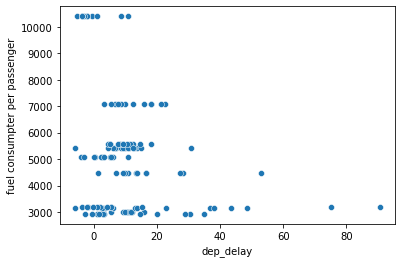

In [312]:
sns.scatterplot(data=fuel_pass, x='dep_delay', y='fuel consumpter per passenger')

<AxesSubplot:xlabel='dep_delay', ylabel='consumption per km'>

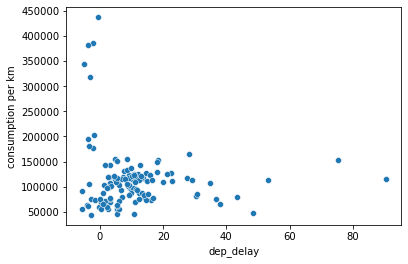

In [313]:
sns.scatterplot(data=fuel_pass, x='dep_delay', y='consumption per km')